# Домашняя работа №1. 
### Тема: Типы и форматы биологических данных. Базы данных
                              
>* Имя файла: ``HW1_Imanaliyeva_Aminat.ipynb``
>* Автор и учебная группа: ``Иманалиева Аминат, мАДБМ-251``
>* Дата создания: ``12.09.2025``
>* Дата последней модификации:  ``13.09.2025``
>* Связанные файлы: ``'GCF_000146465.1_ASM14646v1_genomic.fna', 'my_first.bam', 'my_first.vcf.gz'``, остальные через ссылку
>* Версия Python: ``3.10.10``

Я вообще люблю в терминале все делать ахаахах, что с командами там всякими связано, но чтобы Вам было удобнее как-то смотреть, подумала впихнуть все один отчет. Ну и как-то чтобы Вы видели описание че как почему я сделала

Для bash kernel: 
``pip install bash_kernel``, 
``python -m bash_kernel.install``


In [47]:
! python --version

Python 3.10.10


In [18]:
! conda env list

# conda environments:
#
biotools                 /home/jupyter-imanalievaah/.conda/envs/biotools
base                     /opt/tljh/user



In [23]:
! python -m ipykernel install --user --name=biotools --display-name "Biotools_env"

Installed kernelspec biotools in /home/jupyter-imanalievaah/.local/share/jupyter/kernels/biotools


### Задание 1. FASTA-формат
1. Определить, **сколько последовательностей** содержится в FASTA-файле *Encephalitozoon intestinalis* (референсная сборка, GCF_000146465.1_ASM14646v1)
2. Посчитать **длину генома**, сравнить с информацией в [NCBI](https://www.ncbi.nlm.nih.gov/?ref=popsugar.com)

Сначала просто просмотрела содержимое файла, по стандарту первая строка с описанием и вторая с нуклеотидной последовательностью

In [3]:
! head GCF_000146465.1_ASM14646v1_genomic.fna

>NC_014415.1 Encephalitozoon intestinalis ATCC 50506 chromosome I, complete sequence
TTCAATCCTCTTCCCCTCTCCCCACATCGAGGAAAAAATGCACAGCCTCAAAATGTCGGATTACTCCTCCATTCGCACAG
CTTGCATCCATAACGGTCGTCTTCCGTCCACATCACAGCGCAGTCAGTCTTCAGGCTTAGAGGCCTTCAGCCATTATACT
CCCGACGTAGCTCCGCAACAGCCAGCAGGCTTGCCGCTCCACCAGAGGTCGCAATCAAGAGTTCCTCTCGTACTATCAAG
ATTTACTGCCCAGTCAATCACAGTAGGGTAAAACTAACCTGTCTCACGACGGTCTAAACCCAGCTCACGTTCCCTGTTGG
TGGGTGAACAATCCAACACTTCGCAATTTCTGCTTCACGATGATAGGAAGAGCCGACATCGAAGAATCAAAAAGCAGCGT
CGCTATGATCGCTCGGCTGCTACAAGCCAGTTATCCCTGTGGTAACTTTTCTGTCACCCATGTCCCAAGCCTTATAGGAC
ATGGGATCTCTAGGCCAGGGTTTCCCCCAAACAATCCCGCAATAGGAATAGTCTCAAGCAGGCTTATGCCCTTGTGCTCC
ACGCGTGGTTTCCTTCCCCGCTGAGCCCGCCTTAGGACGTCTGCGTTAGTCTTTAGCAGTCGTGCCGCCCCAGCCAAACT
CCCCACATCCATAAATAAACCGCTGAGGCTCAGTCATAGTGGTCTCGCACATCTCCCCCCACCTCTCTTCATAACCACCC


Чтобы определить количество последовательностей (в нашем случае complete seq - chr), просто по поиску через греп вывела первые строчки, которые несут информацию о последовательности. Получила 11 хромосом

In [12]:
! grep '>' GCF_000146465.1_ASM14646v1_genomic.fna

>NC_014415.1 Encephalitozoon intestinalis ATCC 50506 chromosome I, complete sequence
>NC_014416.1 Encephalitozoon intestinalis ATCC 50506 chromosome II, complete sequence
>NC_014417.1 Encephalitozoon intestinalis ATCC 50506 chromosome III, complete sequence
>NC_014418.1 Encephalitozoon intestinalis ATCC 50506 chromosome IV, complete sequence
>NC_014419.1 Encephalitozoon intestinalis ATCC 50506 chromosome V, complete sequence
>NC_014420.1 Encephalitozoon intestinalis ATCC 50506 chromosome VI, complete sequence
>NC_014421.1 Encephalitozoon intestinalis ATCC 50506 chromosome VII, complete sequence
>NC_014422.1 Encephalitozoon intestinalis ATCC 50506 chromosome VIII, complete sequence
>NC_014423.1 Encephalitozoon intestinalis ATCC 50506 chromosome IX sequence
>NC_014424.1 Encephalitozoon intestinalis ATCC 50506 chromosome X, complete sequence
>NC_014425.1 Encephalitozoon intestinalis ATCC 50506 chromosome XI, complete sequence


Для проверки перешла на страницу с геномом *[Encephalitozoon intestinalis](https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_000146465.1/)*, прокрутила в раздел хромосомы (таблица из раздела Chromosomes), насчитала их тоже 11

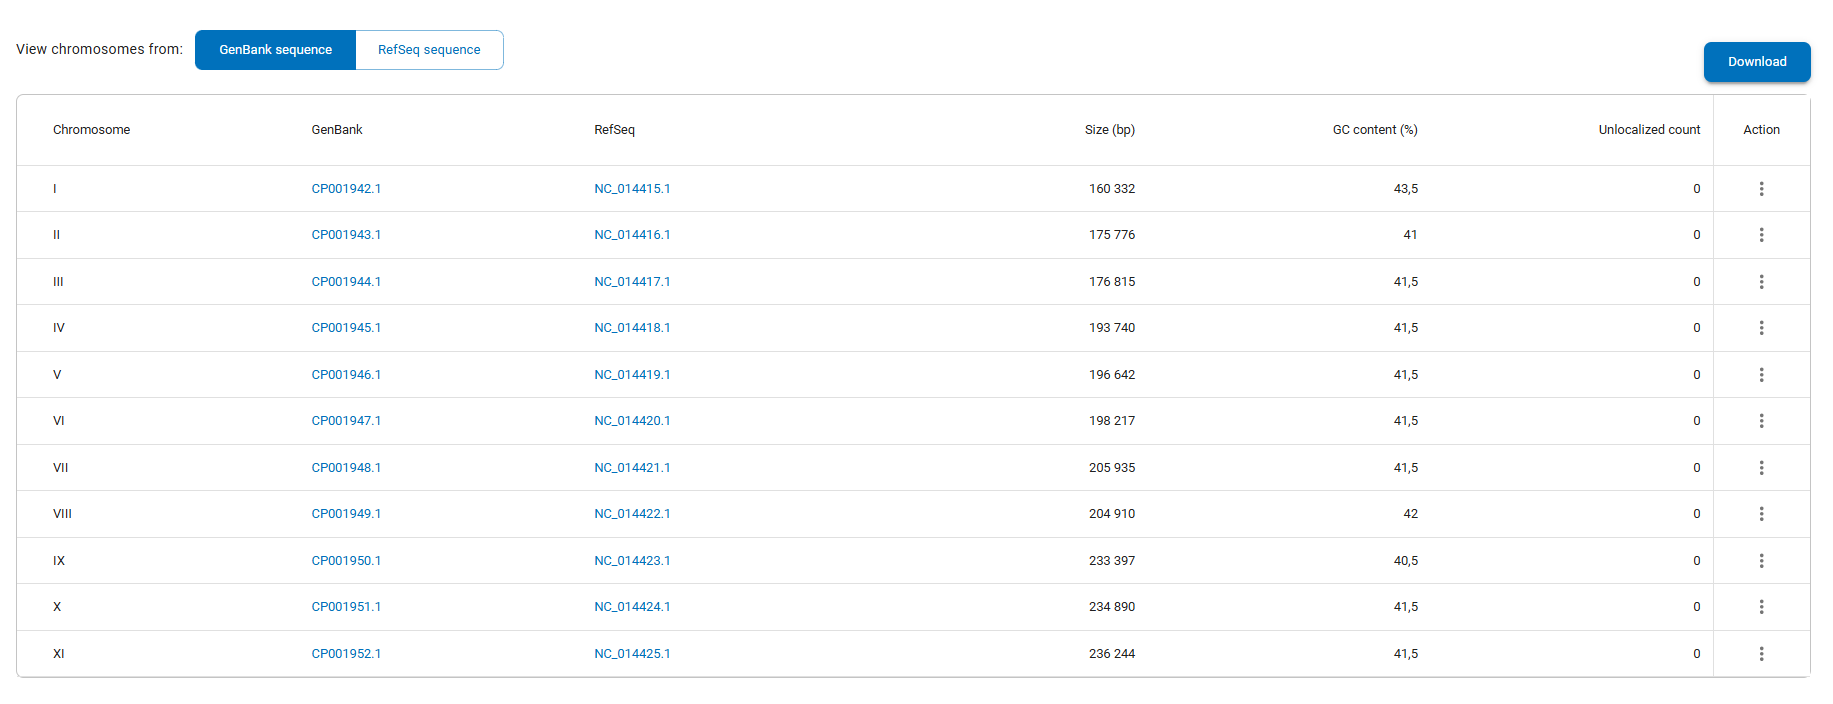

Для определения длины генома сделала обратную операцию: нашла все последовательности, убрав строки с описанием (-v знак НЕ включения), после убрала все переходы через вторую команду после знака объединения и на новую строку и вывела подсчет:

In [17]:
! grep -v '>' GCF_000146465.1_ASM14646v1_genomic.fna |  tr -d "\n" | wc -c

2216898


если еще раз посмотреть на сам файл выше, то мы видим, что строки разделены переносом и я просто его убрала и посчитала длину этой строки. Получила **2,2 где-то миллиона длину генома**

Сравнила результат с NCBI в разделе статистики
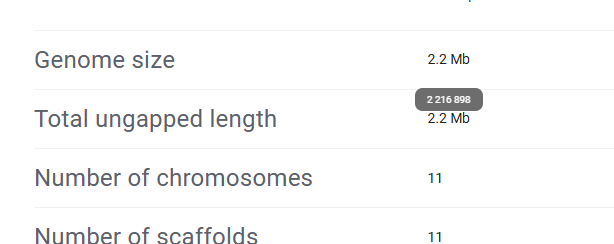

гуд!
совпало

### Задание 2. FASTQ-формат
1. Ссылка get ddRADseq of *[Zonotrichia atricapilla](https://www.ebi.ac.uk/ena/browser/view/SRX10559460)*
2. Посчитать **количество ридов** в файле
3. Посчитать количество **оснований** в файле
4. Посмотреть на **статистику** по файлу, найти **среднюю длину** рида


Скачала отчет на сайте, открыла его содержимое и нашла ссылку на fastq (там был еще на сайте Generated FASTQ files)

``run_accession	sample_accession	experiment_accession	study_accession	tax_id	scientific_name	fastq_ftp	submitted_ftp	sra_ftp	bam_ftp
SRR14192680	SAMN18647512	SRX10559460	PRJNA720382	44392	Zonotrichia atricapilla	ftp.sra.ebi.ac.uk/vol1/fastq/SRR141/080/SRR14192680/SRR14192680.fastq.gz		ftp.sra.ebi.ac.uk/vol1/srr/SRR141/080/SRR14192680``

In [5]:
! pwd

/home/jupyter-imanalievaah/aimanalieva


In [4]:
! wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR141/080/SRR14192680/SRR14192680.fastq.gz

--2025-09-12 06:55:45--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR141/080/SRR14192680/SRR14192680.fastq.gz
           => ‘SRR14192680.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR141/080/SRR14192680 ... done.
==> SIZE SRR14192680.fastq.gz ... 127026156
==> PASV ... done.    ==> RETR SRR14192680.fastq.gz ... done.
Length: 127026156 (121M) (unauthoritative)

SRR14192680.fastq.g 100%[===================>] 121.14M  35.8MB/s    in 3.4s    

2025-09-12 06:55:50 (35.8 MB/s) - ‘SRR14192680.fastq.gz’ saved [127026156]



In [7]:
! gunzip SRR14192680.fastq.gz

In [8]:
! head SRR14192680.fastq

@SRR14192680.1 1_1101_1943_2211/1
TGCAGGACAGAATGGTTGGGGGGACCAAAGGGGAAGGGGTGACACCACTGTCACTGTCCCCCCAATCCACAGTACTCACACTGCACATGTTT
+
FFFFFFIIIIIIIIIFIIIIIIFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFBBFFFFFFFFFFFFFFFFFFFFFF
@SRR14192680.2 1_1101_3091_2142/1
TGCAGGCGGAGGAACATGTTGTCAATGATGTTCTCAAACTCGATCAGGCGCTTCTGGTTGTTCAGCATGTGGGCTCTCATCTGCTCCAGCCG
+
FFFFFFIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIFFFFFFFFFFFFFFFFFFFFBFFFFFFFFFFFFFFFFFFFFFFF
@SRR14192680.3 1_1101_4291_2239/1
TGCAGGGTTCCTGTGTGGAAAGACCCAGCCTGGAGGGTCTCCTGCCACCCCTTCCCAGGCAGGAATGAGGGCAGTGAGCCTTCCAGGGGTAT


1. **Количество ридов**: вывела сколько строк в файле и поскольку на каждую последовательность приходится 4 строки (информация, последовательность, сепаратор, фред-качество в аски), я просто итог разделила на 4 и получила **2253669 ридов**

In [9]:
! wc -l SRR14192680.fastq

9014676 SRR14192680.fastq


In [10]:
9014676  / 4

2253669.0

можно было еще найти через grep '@SR' и получить тот же ответ (совпал)

2. **Количество оснований** каждая вторая строка , считаю ее длину и вывожу в сумму. 

In [1]:
! awk 'NR%4==2 {sum += length($0)} END {print sum}' SRR14192680.fastq

207337548


In [24]:
# ну или так, в одну строчку через удаление и фильтрацию :)
! cat SRR14192680.fastq | grep -v "^+" | grep -v "^@" | tr -d '\n' | wc -c 

414675096


In [ ]:
414675096 .2 

3. **Статистика по файлу**: сделала через seqtk

Ответ: средняя длина рида, **avg_len: 92.00**

### Задание 3. SAM / BAM / CRAM
1. Определить **сборку** BAM файла
2. Вывести **длину самой короткой** хромосомы 

1. Чтобы узнать сборку BAM файла в принципе можно найти инструмент для выравнивания в заголовке ахах (bwa mem)

Ответ: **hg38**

2. Длина самой короткой хромосомы: скопировала к себе бамку, проиндексировала ее и записала статистику через idxstats, в первых двух колонках хромосома и ее длина

В общем, если не отфильтровать по 1-22, XY,M то выйдут HLA и декой контиги (самый короткий chrUn_KI270394v1 970), поэтому я отфильтровала именно по хромосомам 1-22XYM через awk и отсортировала по возрастанию 

Ответ: **chrM (16569)**

### Задание 4. BED-формат
1. Файл с тандемными повторами для [D.melanogaster/dm6](https://hgdownload.soe.ucsc.edu/goldenPath/dm6/bigZips/dm6.trf.bed.gz)
2. Посчитать, **сколько генов аннотировано на chr22**
3. Определить, какие **гены пересекаются** с указанным интервалом (например, chr22:20000000-21000000).

In [60]:
! wget https://hgdownload.soe.ucsc.edu/goldenPath/dm6/bigZips/dm6.trf.bed.gz

--2025-09-13 11:06:54--  https://hgdownload.soe.ucsc.edu/goldenPath/dm6/bigZips/dm6.trf.bed.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 336300 (328K) [application/x-gzip]
Saving to: ‘dm6.trf.bed.gz’

dm6.trf.bed.gz      100%[===================>] 328.42K   402KB/s    in 0.8s    

2025-09-13 11:06:57 (402 KB/s) - ‘dm6.trf.bed.gz’ saved [336300/336300]



In [61]:
! gunzip dm6.trf.bed.gz

Отфильтровала содержимое файла по хромосоме 4, как надо было в задании

**119 геномных координат** для хромосомы 4

Взяла gtf-аннотацию из UCSC на **dm6**

In [ ]:
! wget https://hgdownload.soe.ucsc.edu/goldenPath/dm6/bigZips/genes/dm6.ensGene.gtf.gz

In [ ]:
! gunzip dm6.ensGene.gtf.gz

Вот так выглядит содержимое файла

In [ ]:
Меня будет в дальнейшем интересовать gene_name

Пересекла через bedtools аннотацию с отфильтрованным файлом по хромосоме 4, -wb чтобы включить данные из аннотации

Посчитала гены чкрез фильтрацию в колонке **аннотации по gene_name**, вывела **уникальные** гены

Вышло вот что-то типо такого: с каждой новой строки название гена

В итоге получила

Ответ: **48** генов, **119** геномных координат для хромосомы 4

Для того, чтобы узнать, сколько координат включены в заданный интервал, мне надо было сделать **BED-файлик** и записать туда его черещ табуляцию (как и требует формат бед) 

не включены 
``bedtools intersect -a chr_4.dm6.bed -b roi.bed -v | wc -l``
107

Вышло 12 регионов :) 

Ответ: **12**

### Задание 5. VCF-формат

1. Определить **сборку** VCF файла
2. Посмотреть статистику:
       а) сколько **MNPs** в этом vcf-файле
       б) соотношение **транзиций и трансверсий** в файле (1st REF), согласуется ли это с обычным распределением, почему?

1. Сборка генома vcf-ки через grep в заголовке (обычно он как reference, можно было и просто по двум решеткам поискать и найти референс 

Ответ: **19 сборка**

2. **MNP** - это вариации замен с длиной REF и ALT > 1 + одинаковой длиной. Если смотреть строго по определению иллюминовской документации, то *MNPs—A variant is counted as an MNP when the reference, allele 1, and allele 2 are all an equal length other than 1.* 

3. **ts** (замена пуринов на пурин или пиримидина на пиримидин) и **tv** (пурин на пиримидин или наоборот)

Сделала статистику по файлу через **bcftools stats** (прикрепила его тоже)

Нашла количество MNP:

In [32]:
! cat 30 stats_vcf.tsv | grep 'MNP'

cat: 30: No such file or directory
#   number of MNPs      .. number of rows with a MNP, such as CC>TT
SN	0	number of MNPs:	1


Ответ: **1**

Вывела строку со статисткой ts tv 

``# TSTV	[2]id	[3]ts	[4]tv[5]ts/tv	[6]ts (1st ALT)	[7]tv (1st ALT)	[8]ts/tv (1st ALT)
``

In [43]:
! grep -E "^TSTV" stats_vcf.tsv

TSTV	0	6040803	2844462	2.12	6036481	2836187	2.13


Получила отношеине **(ts/tv ratio)** 

In [70]:
! grep -E "^TSTV" stats_vcf.tsv | awk '{print $5}'

2.12


**Вот более полный вывод с результатами статистики**

In [71]:
! grep -E "^TSTV" stats_vcf.tsv | awk '{print "Ts: "$3"\nTv: "$4"\nTs/Tv: "$5}'

Ts: 6040803
Tv: 2844462
Ts/Tv: 2.12


По результату как будто бы все окей вообще, поскольку транзиции (Ti) возникают в природе чаще, чем трансверсии (Tv), часто связаны, например, с дезаминированием цитозина (C>T). Считаю, что в целом высокий показатель без шума или ошибок низкого качества 

Честно сказать, я думала до проверки в файле со статистикой, что для MSP можно было сделать авк поиск по 4 колонке где ref и 5 где alt строки более 1 в обоих случаев (&& - и) и чтобы длина была одинаковой в этих двух колонках, но получила большой результат. Доверяю больше содержимому файла, но на всякий случай это тоже оставлю..

``(biotools) jupyter-imanalievaah@hse-2025-compute:~/common/resources/seminar1$ bcftools view -H my_first.vcf.gz | awk 'length($4) > 1 && length($5) > 1 && length($4) == length($5)' | wc -l``
**5537**

## Примечание
P.S. Часть заданий я сделала непосредственно в терминале потому что отвалилось окружение в юпитере.

не возбраняйте сильно(